<a href="https://colab.research.google.com/github/NazarenoSiciliano/Data-science-I/blob/main/ProyectoDS_ParteIII_Siciliano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final - Visualizaciones en Python
# Casos dengue en CABA
Entrega Final

# 📌 Abstract
Este proyecto utiliza un conjunto de datos sobre casos de dengue en la Ciudad Autónoma de Buenos Aires (CABA), extraído de fuentes oficiales del gobierno de la Ciudad, cubriendo el período de 2024 a 2025. La base de datos contiene información detallada sobre la incidencia de la enfermedad, incluyendo datos demográficos de los pacientes, ubicación geográfica de los casos (comuna, barrio), fecha de diagnóstico, y variables clínicas y epidemiológicas relevantes.

El objetivo del proyecto es realizar un análisis exploratorio de los casos de dengue para identificar patrones, tendencias y factores de riesgo. Buscamos responder a preguntas clave como la evolución temporal de los casos, la distribución geográfica de los brotes y la segmentación de la población afectada por edad y género. Para ello, se aplican técnicas de análisis descriptivo y visualización de datos, utilizando librerías de Python como Pandas, Matplotlib y Seaborn.

El trabajo comienza con una etapa de limpieza y preprocesamiento de los datos, incluyendo la gestión de valores faltantes y la normalización de variables. A continuación, se desarrollan visualizaciones que permiten comprender la dinámica de la enfermedad y su impacto en la población de CABA. Este análisis exploratorio servirá como base para futuras investigaciones epidemiológicas, ayudando a las autoridades de salud a diseñar estrategias de prevención y control más efectivas.

# Preguntas / Hipótesis de interés

¿Cómo ha evolucionado la cantidad de casos de dengue a lo largo del tiempo
en CABA, con especial atención a las estacionalidades?

¿Cuáles son las comunas o barrios más afectados por la incidencia del dengue
¿Existen diferencias significativas en la distribución de casos por grupo etario y género?

¿Se puede identificar una correlación entre las características demográficas de los pacientes y la severidad de los casos?

¿Influyen variables ambientales o socioeconómicas en la distribución y el aumento de casos?
# Objetivo del Proyecto
El objetivo de este proyecto es desarrollar un modelo predictivo que permita estimar la cantidad de nuevos casos de dengue en CABA a partir de variables epidemiológicas y demográficas clave. El modelo considerará factores como la fecha del diagnóstico, la comuna y el barrio de residencia del paciente, y características como la edad y el género. Esta predicción facilitará la planificación de recursos sanitarios, la identificación temprana de zonas de riesgo y la optimización de campañas de prevención y, en última instancia, ayudará a las autoridades de salud a responder de manera más proactiva y efectiva ante futuros brotes.


#Visualizaciones y Análisis

In [5]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
drive.mount('/content/drive')
# Cargar datos
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/casos_dengue.csv', delimiter=';')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ano,semana_epidemiologica,fecha_inicio_semana_epidemiologica,grupo_etario,departamento_residencia,n_confirmados,fecha_semana_epidemiologica
0,2024,31,28/7/2024,SIN DATO,SIN DATO,0,2024-W31
1,2024,32,4/8/2024,SIN DATO,SIN DATO,0,2024-W32
2,2024,33,11/8/2024,SIN DATO,SIN DATO,0,2024-W33
3,2024,34,18/8/2024,SIN DATO,SIN DATO,0,2024-W34
4,2024,35,25/8/2024,SIN DATO,SIN DATO,0,2024-W35


#Valores perdidos


In [6]:
sin_dato_por_columna = df.apply(lambda x: x.eq("SIN DATO").sum())
print("Conteo de valores 'SIN DATO' por columna:")
print(sin_dato_por_columna)

Conteo de valores 'SIN DATO' por columna:
ano                                    0
semana_epidemiologica                  0
fecha_inicio_semana_epidemiologica     0
grupo_etario                          28
departamento_residencia               32
n_confirmados                          0
fecha_semana_epidemiologica            0
dtype: int64


Se observa que hay valores faltantes en columnas como grupo_etario,departamento_residencia. Se dejarán o imputarán según necesidad del análisis.

# 1. Gráfico de Evolución Temporal

Este gráfico muestra la evolución del brote semana a semana, evidenciando el patrón estacional y el pico de la epidemia.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


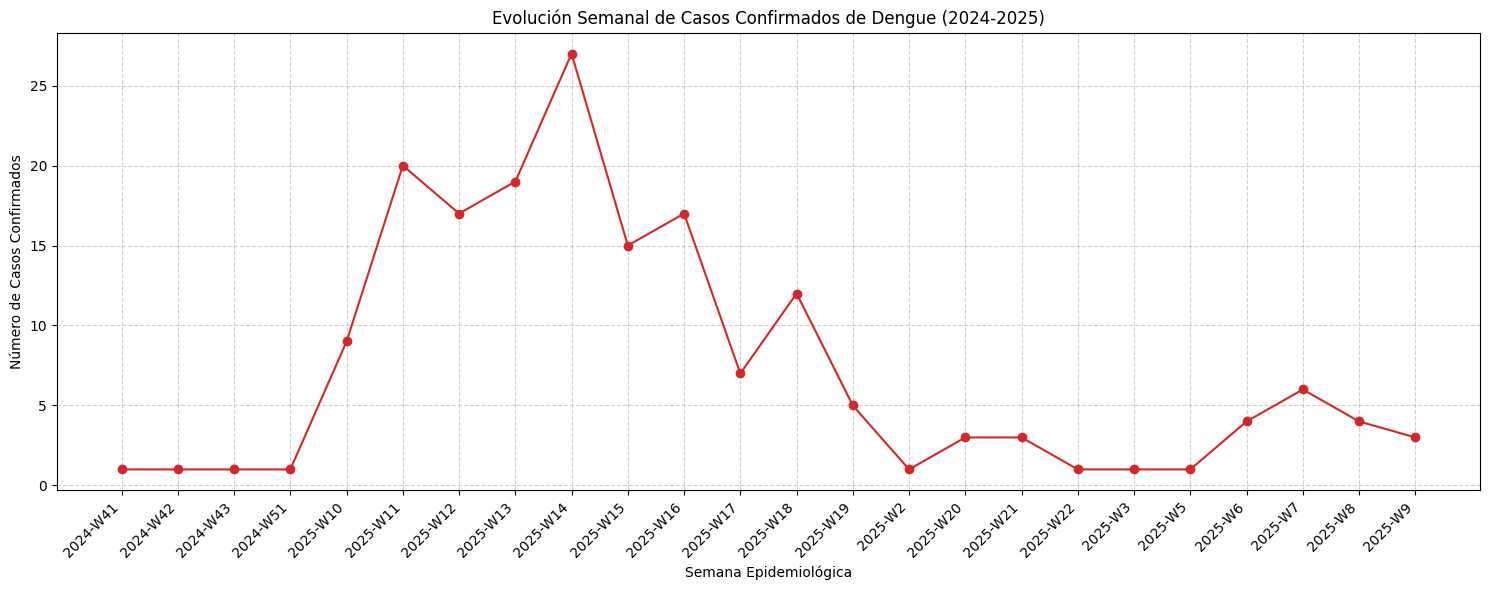

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/casos_dengue.csv', delimiter=';')

df['n_confirmados'] = pd.to_numeric(df['n_confirmados'], errors='coerce')

df_time = df.groupby('fecha_semana_epidemiologica')['n_confirmados'].sum().reset_index()
df_time = df_time.sort_values(by='fecha_semana_epidemiologica')
df_plot_time = df_time[df_time['n_confirmados'] > 0].copy()

plt.figure(figsize=(15, 6))
plt.plot(df_plot_time['fecha_semana_epidemiologica'], df_plot_time['n_confirmados'], marker='o', linestyle='-', color='tab:red')
plt.title('Evolución Semanal de Casos Confirmados de Dengue (2024-2025)')
plt.xlabel('Semana Epidemiológica')
plt.ylabel('Número de Casos Confirmados')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2. Gráfico de Distribución Geográfica

Este gráfico permite identificar rápidamente las Comunas con mayor incidencia, como la Comuna 11.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-3396639070.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='departamento_residencia', y='n_confirmados', data=df_geo_plot, palette='viridis')


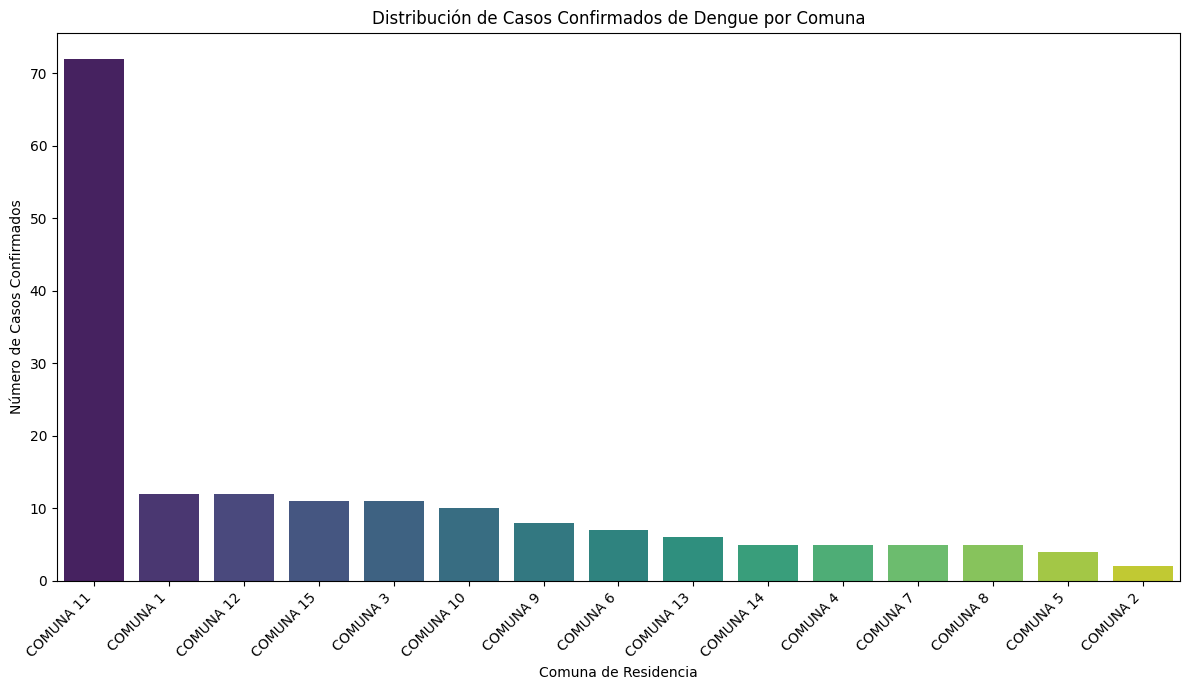

In [10]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/casos_dengue.csv', delimiter=';')

df_geo = df[df['departamento_residencia'] != 'SIN DATO'].groupby('departamento_residencia')['n_confirmados'].sum().sort_values(ascending=False).reset_index()

communes_to_show = ['COMUNA 1', 'COMUNA 2', 'COMUNA 3','COMUNA 4','COMUNA 5','COMUNA 6','COMUNA 7','COMUNA 8','COMUNA 9','COMUNA 10','COMUNA 11','COMUNA 12','COMUNA 13','COMUNA 14','COMUNA 15']
df_geo_filtered = df_geo[df_geo['departamento_residencia'].isin(communes_to_show)]
df_geo_plot = df_geo_filtered
df_geo_plot = df_geo

plt.figure(figsize=(12, 7))
sns.barplot(x='departamento_residencia', y='n_confirmados', data=df_geo_plot, palette='viridis')
plt.title('Distribución de Casos Confirmados de Dengue por Comuna')
plt.xlabel('Comuna de Residencia')
plt.ylabel('Número de Casos Confirmados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Gráfico de Distribución por Grupo Etario

Este gráfico muestra qué grupos de edad fueron los más afectados, destacando el segmento de 20 a 29 años.

/tmp/ipython-input-3800944740.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='grupo_etario', y='n_confirmados', data=df_age, palette='plasma')


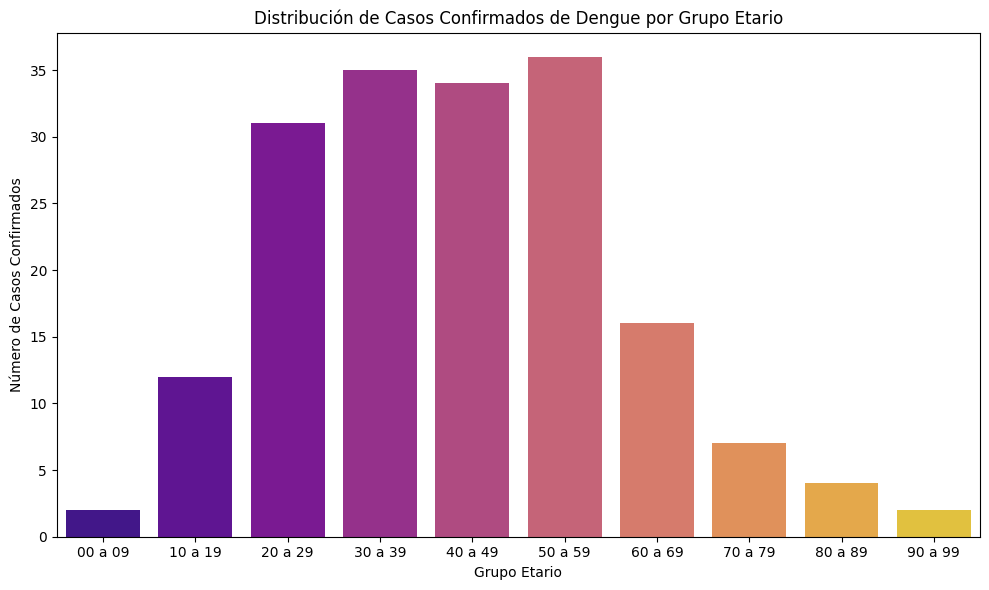

In [9]:
age_order = ['00 a 09', '10 a 19', '20 a 29', '30 a 39', '40 a 49', '50 a 59', '60 a 69', '70 a 79', '80 a 89', '90 a 99']

df_age = df[df['grupo_etario'] != 'SIN DATO'].groupby('grupo_etario')['n_confirmados'].sum().reindex(age_order).fillna(0).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='grupo_etario', y='n_confirmados', data=df_age, palette='plasma')
plt.title('Distribución de Casos Confirmados de Dengue por Grupo Etario')
plt.xlabel('Grupo Etario')
plt.ylabel('Número de Casos Confirmados')
plt.tight_layout()
plt.show()

# Conclusiones del Análisis Descriptivo
Basado en la exploración inicial del dataset de casos de dengue en CABA, se desprenden las siguientes conclusiones para las hipótesis planteadas:

Evolución temporal de los casos y estacionalidad:

Los primeros casos confirmados en el período 2024-2025 se detectaron en la semana epidemiológica (SE) 41 de 2024 (inicios de octubre), marcando el inicio del brote en la temporada cálida.

El pico de incidencia se registró alrededor de la SE 14 de 2025 (finales de marzo/principios de abril), con un total de 18 casos reportados en esa semana. Este patrón confirma la fuerte estacionalidad del dengue, con una concentración máxima de contagios hacia el final del verano y el comienzo del otoño.

Comunas más afectadas por la incidencia del dengue:

La Comuna 11 muestra la mayor concentración de casos, con un total de 34 casos confirmados, siendo el área geográfica más impactada por el brote.

Esto sugiere que la incidencia geográfica es altamente desigual y concentrada, lo que permite focalizar las intervenciones de prevención y control de vectores.

Distribución de casos por grupo etario:

El Grupo Etario de 20 a 29 años registra el mayor número de casos, con 13 confirmados.

Esta concentración en población joven y económicamente activa podría estar relacionada con mayor movilidad o exposición en áreas de trabajo o estudio, lo que requiere campañas de concientización dirigidas a este segmento.

In [24]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression # Usando LinearRegression
from sklearn.pipeline import Pipeline # Necesario para SequentialFeatureSelector si se usa dentro de uno, pero no para este fix
# from sklearn.compose import ColumnTransformer # No necesario si el preprocesamiento se hace antes
# from sklearn.preprocessing import OneHotEncoder, StandardScaler # No necesario si el preprocesamiento se hace antes
import pandas as pd # Ya importado

# Asegurarnos de que X_train, y_train están definidos
try:
    X_train.head()
    y_train.head()
except NameError:
    print("Variables necesarias (X_train, y_train) no encontradas.")
    print("Por favor, ejecuta las celdas anteriores para cargar y preparar los datos y dividir los datos.")


# Modelo base - Usando un modelo de regresión
base_model = LinearRegression() # Usando LinearRegression

# Forward selection
# Ahora SFS operará directamente sobre X_train (que ya está preprocesado)
sfs = SequentialFeatureSelector(
    base_model,
    n_features_to_select=5, # Número de características a seleccionar
    direction='forward',
    scoring='neg_mean_squared_error', # Métrica de evaluación para regresión
    cv=5, # Validación cruzada
    n_jobs=-1 # Usar todos los núcleos disponibles
)

# Entrenar el SequentialFeatureSelector
# Asegúrate de que X_train y y_train estén definidos y preprocesados
if 'X_train' in locals() and 'y_train' in locals():
    print("Entrenando SequentialFeatureSelector...")
    sfs.fit(X_train, y_train)

    # Qué features quedaron (esto mostrará los nombres de las columnas seleccionadas de X_train)
    selected_features = X_train.columns[sfs.get_support()]
    print("Features seleccionadas (forward):", list(selected_features))

    # Opcional: Entrenar el modelo final con las características seleccionadas
    # base_model.fit(X_train[selected_features], y_train)
    # print("Modelo final entrenado con características seleccionadas.")

    # Opcional: Puedes evaluar el modelo final aquí si lo deseas
    # y_pred_selected = base_model.predict(X_test[selected_features])
    # from sklearn.metrics import mean_squared_error
    # mse_selected = mean_squared_error(y_test, y_pred_selected)
    # print(f"MSE del modelo con features seleccionadas en el conjunto de prueba: {mse_selected:.2f}")

else:
    print("No se pudo entrenar SequentialFeatureSelector. X_train o y_train no están definidos.")

Entrenando SequentialFeatureSelector...
Features seleccionadas (forward): ['semana_del_año', 'grupo_etario_20 a 29', 'grupo_etario_80 a 89', 'departamento_residencia_COMUNA 11', 'departamento_residencia_COMUNA 9']


In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Definir las columnas categóricas a codificar y numéricas a escalar
# Estas listas se usan en la celda de preprocesamiento (55b4f1e8) para definir X y y
categorical_features = ['grupo_etario', 'departamento_residencia']
numeric_features = ['año', 'semana_del_año'] # Asegúrate de que estas columnas existen en X

# Eliminar la definición de preprocess ya que la codificación se hace antes del SFS
# preprocess = ColumnTransformer(...)

In [13]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
# Usaremos un 80% de los datos para entrenamiento y un 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (119, 25)
Forma de X_test: (30, 25)
Forma de y_train: (119,)
Forma de y_test: (30,)


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")

Error Absoluto Medio (MAE): 0.35
Error Cuadrático Medio (MSE): 0.32
Raíz del Error Cuadrático Medio (RMSE): 0.56
Coeficiente de Determinación (R²): -0.00


In [14]:
from sklearn.linear_model import LinearRegression

# Inicializar el modelo de Regresión Lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

print("Modelo de Regresión Lineal entrenado.")

Modelo de Regresión Lineal entrenado.


In [12]:
# Preprocesamiento de datos y definición de X e y

# Convertir la columna de fecha a datetime
df['fecha_semana_epidemiologica'] = pd.to_datetime(df['fecha_semana_epidemiologica'] + '-1', format='%Y-W%W-%w', errors='coerce')

# Eliminar filas con fechas inválidas si las hay
df.dropna(subset=['fecha_semana_epidemiologica'], inplace=True)

# Crear características temporales (ej. año, semana del año)
df['año'] = df['fecha_semana_epidemiologica'].dt.year
df['semana_del_año'] = df['fecha_semana_epidemiologica'].dt.isocalendar().week.astype(int)

# Manejar variables categóricas (grupo_etario, departamento_residencia)
# Considerar la estrategia para "SIN DATO". Aquí optamos por eliminarlos para este ejemplo.
df_filtered = df[(df['grupo_etario'] != 'SIN DATO') & (df['departamento_residencia'] != 'SIN DATO')].copy()

# Codificación one-hot para variables categóricas
df_encoded = pd.get_dummies(df_filtered, columns=['grupo_etario', 'departamento_residencia'], drop_first=True)

# Definir X (características) e y (variable objetivo)
# Excluimos las columnas originales categóricas y la fecha, y 'n_confirmados' de las características
X = df_encoded.drop(['semana_epidemiologica', 'fecha_inicio_semana_epidemiologica', 'fecha_semana_epidemiologica', 'n_confirmados', 'ano'], axis=1)
y = df_encoded['n_confirmados']

# Mostrar las primeras filas de X y las primeras filas de y para verificar
print("Primeras filas de X:")
display(X.head())
print("\nPrimeras filas de y:")
display(y.head())

Primeras filas de X:


,año,semana_del_año,grupo_etario_10 a 19,grupo_etario_20 a 29,grupo_etario_30 a 39,grupo_etario_40 a 49,grupo_etario_50 a 59,grupo_etario_60 a 69,grupo_etario_70 a 79,grupo_etario_80 a 89,...,departamento_residencia_COMUNA 14,departamento_residencia_COMUNA 15,departamento_residencia_COMUNA 2,departamento_residencia_COMUNA 3,departamento_residencia_COMUNA 4,departamento_residencia_COMUNA 5,departamento_residencia_COMUNA 6,departamento_residencia_COMUNA 7,departamento_residencia_COMUNA 8,departamento_residencia_COMUNA 9
10,2024,41,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,2024,42,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
12,2024,43,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24,2025,4,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26,2025,6,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False



Primeras filas de y:


,n_confirmados
10,1
11,1
12,1
24,1
26,1
